# List 1

**Introduction to tools for data analysis and classification model building**

In the following tasks you will use the *Adult* dataset available in the `sklearn` library.

In [1]:
from sklearn.datasets import fetch_openml
adult = fetch_openml("adult", version=2, as_frame=True)
df = adult.frame

# My code
import pandas as pd
import numpy as np

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In this version of the dataset, the target variable is the `class` column.
While completing the tasks, you should use the following libraries: `pandas`, `matplotlib`, `sklearn`, and `torch`.

---

## 1. EDA — pandas

The goal of this section is to become familiar with basic operations on a `DataFrame`.

### Task 1 — Basic information

1. Print the number of rows and columns in the dataset.
2. Print the names of all columns.
3. Check the number of missing values in each column.
4. Display descriptive statistics for numerical columns using the appropriate `pandas` method.

In [2]:
# 1

print(df.shape)

# 2

print(list(df.columns))

# 3

# print(df.isna())
print(df.isna().sum())

# 4

print(df.info())
print(df.describe())

(48842, 15)
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64
<class 'pandas.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   mari

### Task 2 — Category counts

1. Compute the number of observations in each category of the `education` variable.
2. Sort the result in descending order by count.
3. Print the five most frequent categories.

In [3]:
# 1

# counting the number of occurrences of each category in the "education" column
education_counts = df["education"].value_counts()
print(education_counts.head(5))

# our way? more controll
education_counts = (
    df.groupby("education")
      .size()
    #   .sort_values(ascending=False)
)

education_counts = education_counts.sort_values(ascending=False)

print(education_counts.head(5))

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
Name: count, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
dtype: int64


### Task 3 — Grouping and aggregation

For each category of the `education` variable, compute:

* the mean value of `hours-per-week`,
* the mean value of `capital-gain`,
* the percentage of observations belonging to the `>50K` class (based on the `class` column).

Use the `groupby()` and `agg()` methods.

In [4]:

print(df.groupby("education").agg({
        'hours-per-week': 'mean',
        'capital-gain': 'mean',
        "class": lambda x: f'{(x == ">50K").mean() * 100:.2f}%'
    }).sort_values(by="hours-per-week", ascending=False))

# Drafts

# print(df.groupby("education")[['hours-per-week']].mean().sort_values(by="hours-per-week", ascending=False))
# print(df.groupby("education")[['capital-gain']].mean().sort_values(by="capital-gain", ascending=False))

# print(df.groupby("education")['hours-per-week'].mean().sort_values(ascending=False))
# print(df.groupby("education")['capital-gain'].mean().sort_values(ascending=False))

# print(df.groupby("education")[['hours-per-week', 'capital-gain']].mean().sort_values(by="hours-per-week", ascending=False))

# print(
#     df.groupby("education")["class"]
#       .apply(lambda x: (x == ">50K").mean())
#       .sort_values(ascending=False)
# )


              hours-per-week  capital-gain   class
education                                         
Prof-school        47.579137  10586.467626  73.98%
Doctorate          46.582492   5727.769360  72.56%
Masters            43.575837   2583.605947  54.91%
Bachelors          42.482492   1762.564984  41.28%
Assoc-voc          41.658418    778.602135  25.33%
Assoc-acdm         40.809494    636.951905  25.80%
HS-grad            40.640775    573.314179  15.86%
7th-8th            39.003141    242.626178   6.49%
5th-6th            38.923379    360.365422   5.30%
Some-college       38.865784    559.961574  18.96%
1st-4th            38.761134    123.591093   3.24%
9th                38.359788    313.398148   5.42%
10th               36.986321    323.049676   6.26%
Preschool          36.566265    732.000000   1.20%
12th               35.374429    208.579909   7.31%
11th               33.952539    203.739514   5.08%


### Task 4 — Filtering data

1. Select observations for which `capital-gain > 0`.
2. Compute the mean `hours-per-week` for this group.
3. Compute the mean `hours-per-week` for observations with `capital-gain == 0`.

In [5]:
capital = df[df['capital-gain'] > 0]
print(capital['hours-per-week'].mean())

capital = df[df['capital-gain'] == 0]
print(capital['hours-per-week'].mean())

# Different approach (because it's binary)
print(
    df.groupby(df['capital-gain'] > 0)['hours-per-week'].mean()
)

43.52614622057001
40.14287946079853
capital-gain
False    40.142879
True     43.526146
Name: hours-per-week, dtype: float64


### Task 5 — Creating a new column

1. Create a new column called `hours_bucket` by dividing `hours-per-week` into intervals of 10 hours using `pd.cut`.
2. Compute the number of observations in each interval.
3. Create a pivot table in which:

   * the index is `hours_bucket`,
   * the columns correspond to `class`,
   * the values represent the number of observations.

## 2. Visualization — matplotlib

Each plot must include a title, axis labels, and a legend (if applicable).

---

### Plot 1 — Histogram

Create a histogram of the `hours-per-week` variable.
Choose the number of bins in a reasonable way.

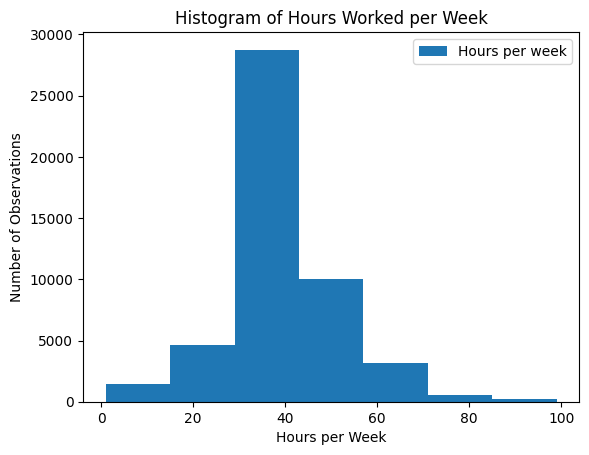

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['hours-per-week'], bins=7, label='Hours per week')

plt.title('Histogram of Hours Worked per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Number of Observations')

plt.legend()
plt.show()

### Plot 2 — Histogram comparison

On a single figure, plot two histograms of `hours-per-week`:

* one for the `<=50K` class,
* one for the `>50K` class.

The histograms should be semi-transparent (set the `alpha` parameter).

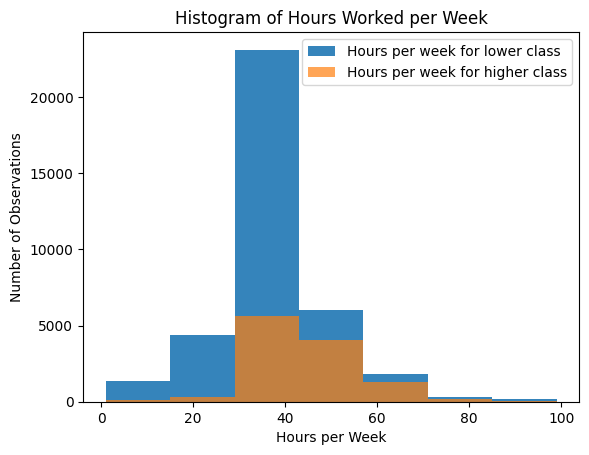

In [7]:
plt.hist(df[df['class'] == '<=50K']['hours-per-week'], bins=7, alpha=0.9, label='Hours per week for lower class')
plt.hist(df[df['class'] == '>50K']['hours-per-week'], bins=7, alpha=0.7, label='Hours per week for higher class')


plt.title('Histogram of Hours Worked per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Number of Observations')

plt.legend()
plt.show()

### Plot 3 — Bar chart

Create a bar chart showing the number of observations for each category of the `education` variable.

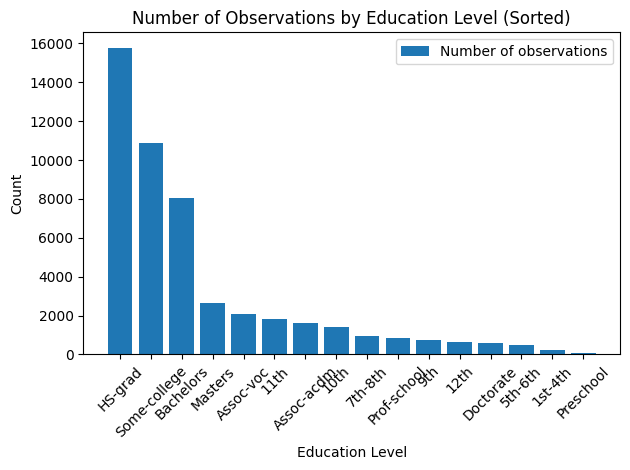

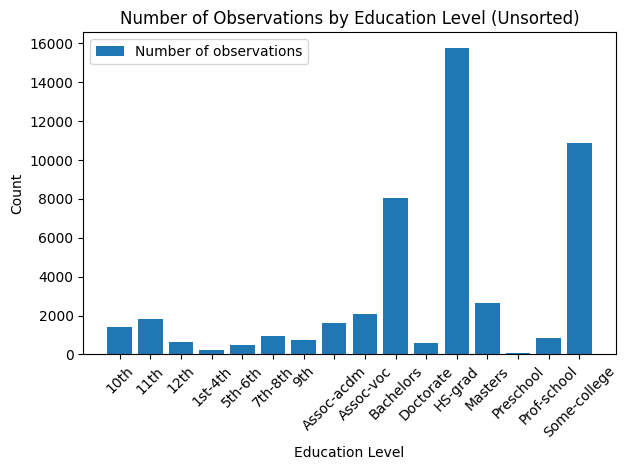

In [8]:
# Copy from the previous exercise

# Sorted version
education_counts_sorted = df["education"].value_counts()

plt.bar(education_counts_sorted.index, education_counts_sorted.values, label="Number of observations")

plt.title("Number of Observations by Education Level (Sorted)")
plt.xlabel("Education Level")
plt.ylabel("Count")

plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Unsorted version
education_counts_unsorted = (
    df.groupby("education")
      .size()
)

plt.bar(education_counts_unsorted.index, education_counts_unsorted.values, label="Number of observations")

plt.title("Number of Observations by Education Level (Unsorted)")
plt.xlabel("Education Level")
plt.ylabel("Count")

plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


### Plot 4 — Scatter plot

Create a scatter plot where:

* the X-axis represents `capital-gain`,
* the Y-axis represents `hours-per-week`.

Set `alpha < 0.3`.

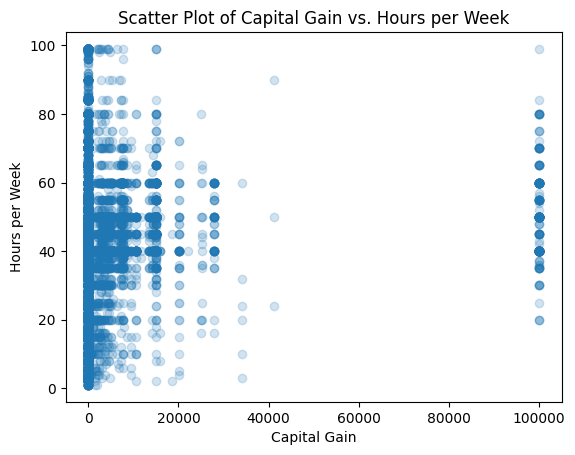

In [9]:
capital_gain = df['capital-gain']
hours_per_week = df['hours-per-week']

plt.scatter(capital_gain, hours_per_week, alpha=0.2)

plt.title('Scatter Plot of Capital Gain vs. Hours per Week')
plt.xlabel('Capital Gain')
plt.ylabel('Hours per Week')

plt.show()

### Plot 5 — Logarithmic scale

Create a histogram of `capital-gain`.
Set the X-axis to a logarithmic scale.

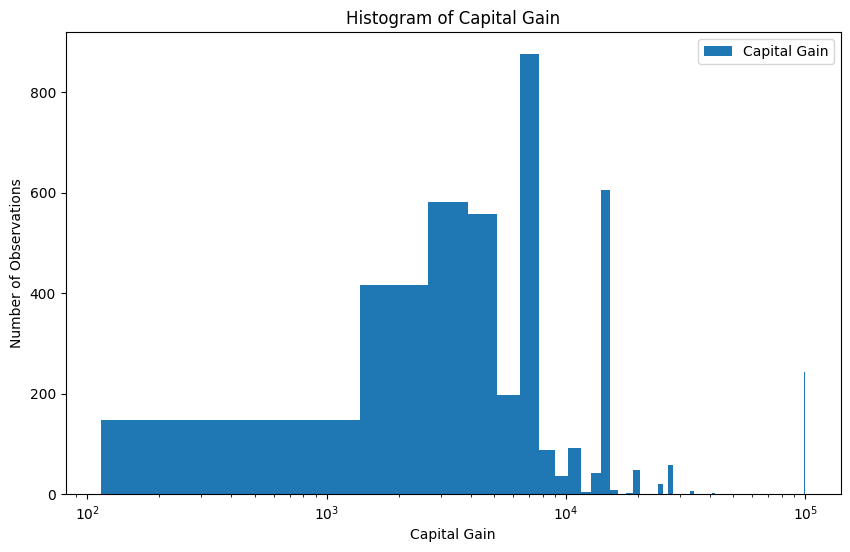

In [10]:
# capital_gain = df['capital-gain']

capital_gain = df[df['capital-gain'] > 0]['capital-gain']

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(capital_gain, bins='auto', label='Capital Gain')

ax.set_xscale('log')

ax.set_title('Histogram of Capital Gain')
ax.set_xlabel('Capital Gain')
ax.set_ylabel('Number of Observations')

plt.legend()
plt.show()

## 3. Data splitting — sklearn

Before splitting the data, separate:

* the feature matrix `X` (all columns except `class`),
* the target vector `y` (the `class` column).

In [11]:
y = df['class']
X = df.drop(columns=['class'])

print(X.head(10))
print(y.head(10))

print(X.shape)
print(y.shape)

   age         workclass  fnlwgt     education  education-num  \
0   25           Private  226802          11th              7   
1   38           Private   89814       HS-grad              9   
2   28         Local-gov  336951    Assoc-acdm             12   
3   44           Private  160323  Some-college             10   
4   18               NaN  103497  Some-college             10   
5   34           Private  198693          10th              6   
6   29               NaN  227026       HS-grad              9   
7   63  Self-emp-not-inc  104626   Prof-school             15   
8   24           Private  369667  Some-college             10   
9   55           Private  104996       7th-8th              4   

       marital-status         occupation   relationship   race     sex  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv        Husband  White

### Task 1 — Train/validation/test split

1. Split the data into:

   * training set (60%),
   * validation set (20%),
   * test set (20%).

2. Use `train_test_split` with the `stratify=y` parameter to preserve class proportions.

3. Print the size of each split.

4. Print the class proportions in each split.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.4,
    stratify=y,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])

print("\nClass proportions:")

print("Train:")
print(y_train.value_counts(normalize=True))

print("\nValidation:")
print(y_val.value_counts(normalize=True))

print("\nTest:")
print(y_test.value_counts(normalize=True))

Train size: 29305
Validation size: 9768
Test size: 9769

Class proportions:
Train:
class
<=50K    0.760723
>50K     0.239277
Name: proportion, dtype: float64

Validation:
class
<=50K    0.760749
>50K     0.239251
Name: proportion, dtype: float64

Test:
class
<=50K    0.760672
>50K     0.239328
Name: proportion, dtype: float64


### Task 2 — Baseline model

The baseline model is a classifier that does not use input features and always predicts the majority class from the training set.

1. Determine the majority class in the training set.
2. Build a classifier that predicts this class for all test observations.
3. Compute the following metrics on the test set:

   * Accuracy,
   * Precision,
   * Recall,
   * F1.

You may implement this manually or use `DummyClassifier(strategy="most_frequent")`.

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

y_pred_val = dummy_clf.predict(X_val)
print("Dummy Classifier Accuracy on Validation Set:", accuracy_score(y_val, y_pred_val))
print("Dummy Classifier Precision on Validation Set:", precision_score(y_val, y_pred_val, average='weighted')) 
print("Dummy Classifier Recall on Validation Set:", recall_score(y_val, y_pred_val, average='weighted'))
print("Dummy Classifier F1 Score on Validation Set:", f1_score(y_val, y_pred_val, average='weighted'))

y_pred_test = dummy_clf.predict(X_test)
print("Dummy Classifier Accuracy on Test Set:", f"{accuracy_score(y_test, y_pred_test) * 100:.2f}%")
print("Dummy Classifier Precision on Test Set:", f"{precision_score(y_test, y_pred_test, average='weighted') * 100:.2f}%")
print("Dummy Classifier Recall on Test Set:", f"{recall_score(y_test, y_pred_test, average='weighted') * 100:.2f}%")
print("Dummy Classifier F1 Score on Test Set:", f"{f1_score(y_test, y_pred_test, average='weighted') * 100:.2f}%")

Dummy Classifier Accuracy on Validation Set: 0.7607493857493858
Dummy Classifier Precision on Validation Set: 0.5787396279180678
Dummy Classifier Recall on Validation Set: 0.7607493857493858
Dummy Classifier F1 Score on Validation Set: 0.6573787645216217
Dummy Classifier Accuracy on Test Set: 76.07%
Dummy Classifier Precision on Test Set: 57.86%
Dummy Classifier Recall on Test Set: 76.07%
Dummy Classifier F1 Score on Test Set: 65.73%


c:\Piotr Pijanowski\Studia\Semestr-6\advanced_data_mining\pracownia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Piotr Pijanowski\Studia\Semestr-6\advanced_data_mining\pracownia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## 4. Pipeline — sklearn

### Task 1 — Preprocessing

1. Split the columns into numerical and categorical features.

2. Build a `ColumnTransformer` where:

   * numerical columns are processed with:

     * `SimpleImputer(strategy="median")`,
     * `StandardScaler`,
   * categorical columns are processed with:

     * `SimpleImputer(strategy="most_frequent")`,
     * `OneHotEncoder(handle_unknown="ignore")`.

3. Fit the preprocessing pipeline on the training set and check the shape of the transformed feature matrix.

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Spliting the columns into numerical and categorical
numerical_cols = X_train.select_dtypes(include=['int64', 'float64', np.number]).columns
categorical_cols = X_train.columns.difference(numerical_cols)

print("Numerical columns:", list(numerical_cols))
print("Categorical columns:", list(categorical_cols))

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

Numerical columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical columns: ['education', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']


### Task 2 — Logistic regression

1. Build a `Pipeline` consisting of:

   * preprocessing,
   * `LogisticRegression(max_iter=1000)`.

2. Train the model on the training set.

3. Compute the following metrics on the validation set:

   * Accuracy,
   * F1,

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

log_reg_clf.fit(X_train, y_train)

y_pred_val = log_reg_clf.predict(X_val)
print("Logistic Regression Accuracy on Validation Set:", f"{accuracy_score(y_val, y_pred_val) * 100:.2f}%")
print("Logistic Regression Precision on Validation Set:", f"{precision_score(y_val, y_pred_val, average='weighted') * 100:.2f}%")
print("Logistic Regression Recall on Validation Set:", f"{recall_score(y_val, y_pred_val, average='weighted') * 100:.2f}%")
print("Logistic Regression F1 Score on Validation Set:", f"{f1_score(y_val, y_pred_val, average='weighted') * 100:.2f}%")

y_pred_test = log_reg_clf.predict(X_test)
print("Logistic Regression Accuracy on Test Set:", f"{accuracy_score(y_test, y_pred_test) * 100:.2f}%")
print("Logistic Regression Precision on Test Set:", f"{precision_score(y_test, y_pred_test, average='weighted') * 100:.2f}%")
print("Logistic Regression Recall on Test Set:", f"{recall_score(y_test, y_pred_test, average='weighted') * 100:.2f}%")
print("Logistic Regression F1 Score on Test Set:", f"{f1_score(y_test, y_pred_test, average='weighted') * 100:.2f}%")


Logistic Regression Accuracy on Validation Set: 85.46%
Logistic Regression Precision on Validation Set: 84.83%
Logistic Regression Recall on Validation Set: 85.46%
Logistic Regression F1 Score on Validation Set: 84.91%
Logistic Regression Accuracy on Test Set: 85.27%
Logistic Regression Precision on Test Set: 84.60%
Logistic Regression Recall on Test Set: 85.27%
Logistic Regression F1 Score on Test Set: 84.66%


## 5. GridSearch

### Task — Hyperparameter tuning for logistic regression

1. Define the parameter grid:

   * `C`: [0.01, 0.1, 1, 10].

2. Use `GridSearchCV` with:

   * `scoring="f1"`,
   * `cv=5`.

3. Fit the model on the training set.

4. Print the best parameters (`best_params_`) and the best cross-validation score (`best_score_`).

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# We have to make own scorer, because we want to specify the positive class for F1 score
f1_pos = make_scorer(f1_score, pos_label=">50K")

param_grid = {"classifier__C": [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(
    estimator=log_reg_clf,
    param_grid=param_grid,
    scoring=f1_pos, # f1 score for the positive class ">50K"
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV F1 score:", f"{grid_search.best_score_ * 100:.2f}%")

Best parameters: {'classifier__C': 1}
Best CV F1 score: 65.22%


## 6. MLP — PyTorch

In this section, use the data after preprocessing (the same transformations as in `sklearn`).

1. Fit the preprocessing pipeline on the training set.
2. Transform the training, validation, and test sets.
3. Convert the resulting matrices to `float32` tensors.
4. Encode the labels as 0 and 1.

---

### Task 1 — Network architecture

Build an MLP with the following structure:

* Input layer: number of neurons equal to the number of features after preprocessing.
* Hidden layer 1: `Linear(in_features, 128)` → `ReLU` → `Dropout(p=0.3)`.
* Hidden layer 2: `Linear(128, 64)` → `ReLU` → `Dropout(p=0.3)`.
* Hidden layer 3: `Linear(64, 32)` → `ReLU` → `Dropout(p=0.3)`.
* Output layer: `Linear(32, 1)`.

Do not apply a sigmoid activation inside the model.
Use `BCEWithLogitsLoss` as the loss function.

### Task 2 — Training

1. Use the `Adam` optimizer.

2. Apply a `StepLR` scheduler with `step_size=5` and `gamma=0.5`.

3. Implement early stopping with `patience=5`, monitoring the validation loss.

4. During each epoch, record:

   * training loss,
   * validation loss,
   * validation accuracy.

5. After training, plot training loss and validation loss as a function of epoch number.

### Task 3 — Evaluation

On the test set, compute:

* Accuracy,
* F1.

## 7. Error analysis

1. Compute predicted probabilities for the positive class on the test set.
2. Identify:

   * 50 false positive cases with the highest predicted probability,
   * 50 false negative cases with the highest predicted probability.

## 8. Final report

In the final report, answer the following questions:

1. Which model achieved the highest F1 score?
2. Do the learning curves indicate a stable training process?
3. Did overfitting occur in the MLP model (compare training and validation loss)?